# CREDO dataset analysis using Auto-Encoders

#### This notebook aims at performing exploratory data analysis on non-labeled CREDO dataset with the help of autoencoders

In [1]:
from skimage.io import imread_collection
import matplotlib.pyplot as plt
import os
import numpy as np
from keras.layers import Input, Dense, Reshape, Flatten
from keras.models import Model
from sklearn.model_selection import train_test_split

In [2]:
PROCESSED_DATA_PATH = r'../data/processed/'
UNPROCESSED_DATA_PATH = r'../data/raw'
FILE_FORMAT = 'png'
COLLECTION_DIR = os.path.join(PROCESSED_DATA_PATH, f'*.{FILE_FORMAT}')

In [3]:
images = imread_collection(COLLECTION_DIR)

In [13]:
len(images)

5915

## Data preparation

In [4]:
images = np.array(images).astype(np.float32) / 255 

In [5]:
X_train, X_test = train_test_split(images, train_size=0.8, random_state=42)

## Creating Autoencoder architecture

In [14]:
input_img = Input(shape=(60, 60, 1))

encoded = Flatten()(input_img)
encoded = Dense(64, activation='relu')(encoded)

# Decoder
decoded = Dense(60 * 60, activation='sigmoid')(encoded)
decoded = Reshape((60, 60, 1))(decoded)

autoencoder = Model(input_img, decoded)
autoencoder.save(r'../models/autoencoder.keras')
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

In [15]:
autoencoder.fit(X_train, X_train, epochs=50, batch_size=256, shuffle=True, validation_data=(X_test, X_test))

Epoch 1/50
19/19 [==============================] - 0s 13ms/step - loss: 0.2458 - val_loss: 0.2395
Epoch 2/50
19/19 [==============================] - 0s 9ms/step - loss: 0.2259 - val_loss: 0.2035
Epoch 3/50
19/19 [==============================] - 0s 10ms/step - loss: 0.1748 - val_loss: 0.1376
Epoch 4/50
19/19 [==============================] - 0s 9ms/step - loss: 0.1060 - val_loss: 0.0722
Epoch 5/50
19/19 [==============================] - 0s 8ms/step - loss: 0.0531 - val_loss: 0.0350
Epoch 6/50
19/19 [==============================] - 0s 9ms/step - loss: 0.0271 - val_loss: 0.0190
Epoch 7/50
19/19 [==============================] - 0s 9ms/step - loss: 0.0158 - val_loss: 0.0120
Epoch 8/50
19/19 [==============================] - 0s 8ms/step - loss: 0.0106 - val_loss: 0.0084
Epoch 9/50
19/19 [==============================] - 0s 8ms/step - loss: 0.0077 - val_loss: 0.0063
Epoch 10/50
19/19 [==============================] - 0s 9ms/step - loss: 0.0059 - val_loss: 0.0049
Epoch 11/50
19/19

In [16]:
decoded_imgs = autoencoder.predict(X_test)

37/37 [==============================] - 0s 1ms/step


In [20]:
mse = np.mean(np.power(Reshape((60, 60, 1))(X_test) - decoded_imgs, 2), axis=(1, 2, 3))
threshold = 0.002

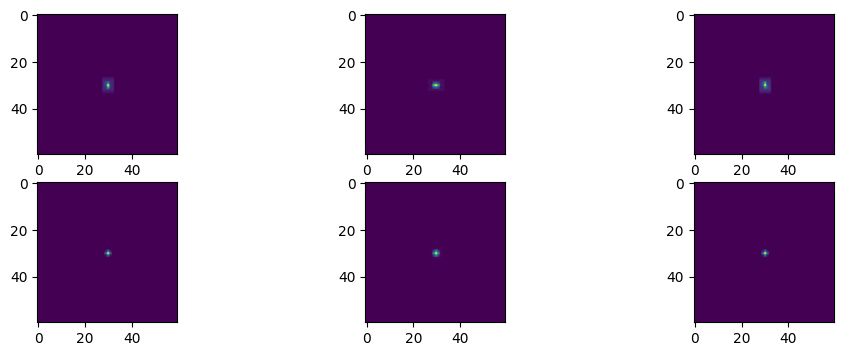

In [21]:
figX, axsX = plt.subplots(2, 3, figsize=(12, 4))

axsX[0][0].imshow(X_test[100].reshape(60, 60))
axsX[0][1].imshow(X_test[200].reshape(60, 60))
axsX[0][2].imshow(X_test[500].reshape(60, 60))
axsX[1][0].imshow(decoded_imgs[100].reshape(60, 60))
axsX[1][1].imshow(decoded_imgs[200].reshape(60, 60))
axsX[1][2].imshow(decoded_imgs[500].reshape(60, 60))

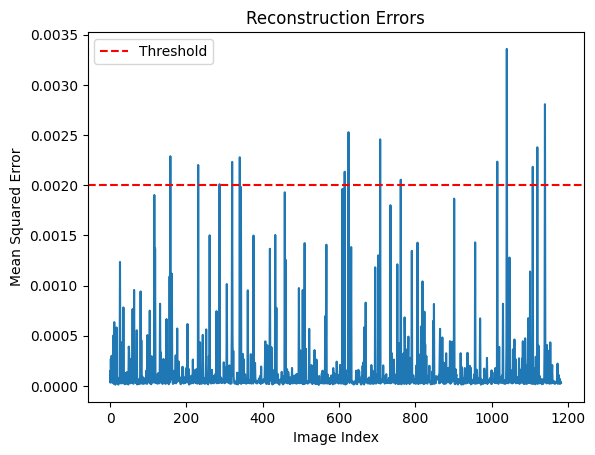

In [22]:
plt.figure()
plt.plot(mse)
plt.title('Reconstruction Errors')
plt.xlabel('Image Index')
plt.ylabel('Mean Squared Error')
plt.axhline(y=threshold, color='r', linestyle='--', label='Threshold')
plt.legend()
plt.show()